In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
#frame size
env.observation_space.shape

(240, 256, 3)

In [4]:
#available actions
env.action_space

Discrete(7)

In [5]:
# done = True
# for step in range(5000):
#     if done:
#         state = env.reset()
#     state, reward, done, info = env.step(env.action_space.sample())
#     env.render(mode='human')

# env.close()

In [6]:
#current frame
state = env.reset()
state.shape

(240, 256, 3)

In [7]:
#return state(frame), reward, done, info
len(env.step(0))

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


4

In [8]:
#grayscale for convert rgb frame to grayscale
from gym.wrappers import GrayScaleObservation
#framestack for capture previous frame
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
import matplotlib.pyplot as plt

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\tensorboard\__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [9]:
#create environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
#simplify movement
env = JoypadSpace(env, SIMPLE_MOVEMENT)

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


(<matplotlib.image.AxesImage at 0x204c2ac9fc0>, (240, 256, 3))

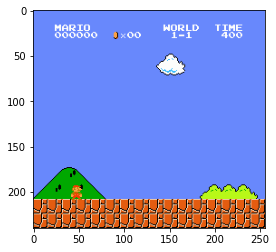

In [10]:
#frame before grayscale
state = env.reset()
plt.imshow(state), state.shape

In [11]:
#convert frame to grayscale
#keep dim - keep last channel (1)
env = GrayScaleObservation(env, keep_dim=True)

(<matplotlib.image.AxesImage at 0x204c2bc62f0>, (240, 256, 1))

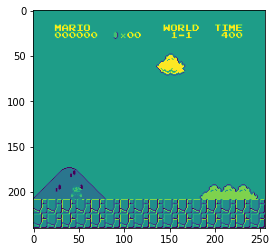

In [12]:
#frame after grayscale
state = env.reset()
plt.imshow(state), state.shape

In [13]:
#wrap with dummy environment
env = DummyVecEnv([lambda: env])
state = env.reset()
state.shape

(1, 240, 256, 1)

In [14]:
#frame stacking
env = VecFrameStack(env, 4, channels_order='last')
state = env.reset()
state.shape

(1, 240, 256, 4)

In [22]:
state = env.reset()

In [35]:
state, reward, done, info = env.step([5])

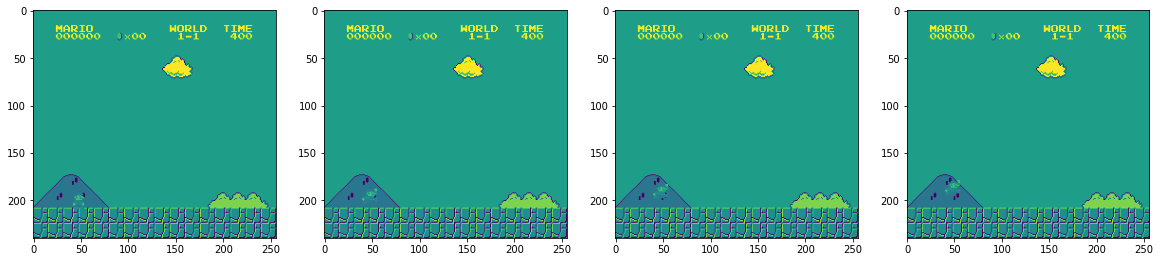

In [36]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [37]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [38]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [39]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [40]:
# setup model saving callback
callback = TrainAndLoggingCallback(check_freq=50000, save_path=CHECKPOINT_DIR)

In [41]:
# create the model
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [42]:
# Train the model
model.learn(total_timesteps=1500000, callback=callback)

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\flatbuffers\compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': pil_image.BILINEAR,
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use

Logging to ./logs/PPO_1
----------------------------
| time/              |     |
|    fps             | 16  |
|    iterations      | 1   |
|    time_elapsed    | 30  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 23            |
|    iterations           | 2             |
|    time_elapsed         | 43            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.7544371e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.0014        |
|    learning_rate        | 1e-06         |
|    loss                 | 167           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000158     |
|    value_loss           | 399           |
-------------------------

In [43]:
model.save('./train/my_model')

In [48]:
model = PPO.load('./train/best_model_1300000')

In [49]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 

: 